In [1]:
import torch
import clip
from PIL import Image

device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load("ViT-B/32", device=device)

image = preprocess(Image.open("./data/CLIP.png")).unsqueeze(0).to(device)
text = clip.tokenize(["a diagram", "a dog", "a cat"]).to(device)

with torch.no_grad():
    image_features = model.encode_image(image)
    text_features = model.encode_text(text)
    
    logits_per_image, logits_per_text = model(image, text)
    probs = logits_per_image.softmax(dim=-1).cpu().numpy()

print("Label probs:", probs)  # prints: [[0.9927937  0.00421068 0.00299572]]

Label probs: [[0.9927   0.004185 0.002968]]


In [2]:
image_features.size()

torch.Size([1, 512])

In [3]:
text_features.size()

torch.Size([3, 512])

In [26]:
logits_per_image

tensor([[25.5625, 20.0938, 19.7500]], device='cuda:0', dtype=torch.float16)

In [27]:
logits_per_text

tensor([[25.5625],
        [20.0938],
        [19.7500]], device='cuda:0', dtype=torch.float16)

In [23]:
probs.sum()

1.0

In [9]:
image_features.size()

torch.Size([1, 512])

In [12]:
text_features.T.size()

torch.Size([512, 3])

In [39]:
import numpy as np

In [41]:
out = torch.matmul(image_features/image_features.norm(dim=1, keepdim=True),((text_features/text_features.norm(dim=1, keepdim=True)).T))*(np.log(1/0.07))

In [42]:
out

tensor([[0.6797, 0.5342, 0.5254]], device='cuda:0', dtype=torch.float16)

In [32]:
out/(1**(0.5))

tensor([[31.6250, 23.8125, 22.6719]], device='cuda:0', dtype=torch.float16)

In [25]:
torch.softmax(out,dim=-1)

tensor([[9.9951e-01, 4.0436e-04, 1.2922e-04]], device='cuda:0',
       dtype=torch.float16)

In [11]:
import torch

In [12]:
from utils.node import *

In [30]:
clip = CLIPModel(vocab_size=10,d_model=512,max_len=1,in_channels=1,image_d_model=512,load_model_path="./model/checkpoint/CLIP0.pth",data_path=None,batch_size=32,lr=0.001)

/home/athip/psu/learning_AI/TextToImage


/home/athip/psu/learning_AI/TextToImage/utils/node.py:695: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  xx = enc(xx)


In [31]:
sum(p.numel() for p in clip.text_encoding.parameters())

173568

In [32]:
sum(p.numel() for p in clip.image_encoding.parameters())

1551744

torch.Size([1, 1, 28, 28])
torch.Size([10, 512])
torch.Size([1, 512])
tensor([[-0.1254, -0.1547, -0.1263, -0.1325,  0.9910, -0.1217, -0.1186, -0.1620,
         -0.1179, -0.1604]], device='cuda:0')
torch.Size([1, 10])
(128, 128)


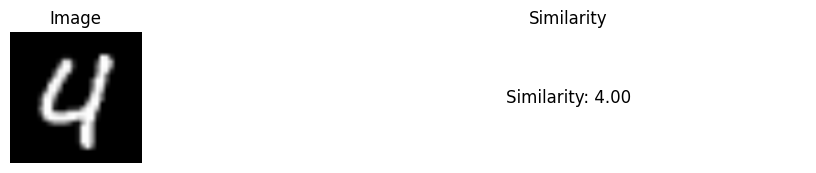

Done


In [35]:
clip.sample_plot_image_clip("e",1)

In [7]:
torch.exp(torch.tensor(0.07))

tensor(1.0725)

In [8]:
torch.cuda.empty_cache()

  5%|▌         | 1/20 [00:08<02:42,  8.58s/it]

Epoch 0 Loss 2.614544189453125


 10%|█         | 2/20 [00:16<02:32,  8.45s/it]

Epoch 1 Loss 2.5894848307291665


 15%|█▌        | 3/20 [00:25<02:23,  8.41s/it]

Epoch 2 Loss 2.581084342447917


 20%|██        | 4/20 [00:33<02:14,  8.40s/it]

Epoch 3 Loss 2.576034407552083


 25%|██▌       | 5/20 [00:42<02:05,  8.40s/it]

Epoch 4 Loss 2.5748048990885417


 30%|███       | 6/20 [00:50<01:57,  8.36s/it]

Epoch 5 Loss 2.571163720703125


 35%|███▌      | 7/20 [00:58<01:48,  8.33s/it]

Epoch 6 Loss 2.569123291015625


 40%|████      | 8/20 [01:06<01:39,  8.32s/it]

Epoch 7 Loss 2.56755986328125


 45%|████▌     | 9/20 [01:15<01:31,  8.32s/it]

Epoch 8 Loss 2.56759189453125


 50%|█████     | 10/20 [01:23<01:22,  8.29s/it]

Epoch 9 Loss 2.566150146484375


 55%|█████▌    | 11/20 [01:31<01:14,  8.28s/it]

Epoch 10 Loss 2.5655377766927083


 60%|██████    | 12/20 [01:40<01:06,  8.33s/it]

Epoch 11 Loss 2.5644478515625


 65%|██████▌   | 13/20 [01:48<00:59,  8.45s/it]

Epoch 12 Loss 2.5642303548177083


 70%|███████   | 14/20 [01:57<00:50,  8.36s/it]

Epoch 13 Loss 2.563377197265625


 75%|███████▌  | 15/20 [02:05<00:41,  8.35s/it]

Epoch 14 Loss 2.564316064453125


 80%|████████  | 16/20 [02:13<00:33,  8.29s/it]

Epoch 15 Loss 2.563413102213542


 85%|████████▌ | 17/20 [02:21<00:24,  8.23s/it]

Epoch 16 Loss 2.5631613444010415


 90%|█████████ | 18/20 [02:30<00:16,  8.28s/it]

Epoch 17 Loss 2.56291826171875


 95%|█████████▌| 19/20 [02:38<00:08,  8.39s/it]

Epoch 18 Loss 2.5626250325520834


100%|██████████| 20/20 [02:47<00:00,  8.37s/it]

Epoch 19 Loss 2.562565852864583
tensor([[ 1.0205, -0.1022, -0.0628,  1.0113, -0.0896, -0.1095, -0.1027, -0.1111],
        [-0.0985,  1.0192, -0.0521, -0.1015, -0.0834, -0.1051, -0.0942, -0.0926],
        [-0.1031, -0.1100,  1.0560, -0.1201, -0.0931, -0.1115, -0.1063,  1.0240],
        [ 1.0205, -0.1022, -0.0628,  1.0113, -0.0896, -0.1095, -0.1027, -0.1111],
        [-0.1002, -0.1006, -0.0565, -0.1052,  1.0343, -0.1041,  1.0180, -0.0912],
        [-0.1021, -0.1052, -0.0611, -0.1126, -0.0899,  1.0133, -0.1066, -0.1041],
        [-0.1002, -0.1006, -0.0565, -0.1052,  1.0343, -0.1041,  1.0180, -0.0912],
        [-0.1031, -0.1100,  1.0560, -0.1201, -0.0931, -0.1115, -0.1063,  1.0240]],
       device='cuda:0')
torch.Size([8, 8])


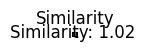

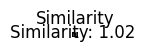

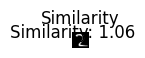

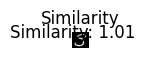

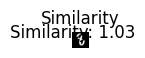

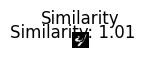

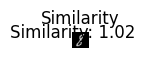

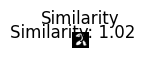

Done


In [ ]:
clip.train_model(num_epoch=20)

In [4]:
clip.sample_plot_image_clip("e",1)

/home/athip/psu/learning_AI/TextToImage/utils/node.py:764: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at /pytorch/aten/src/ATen/native/TensorShape.cpp:3725.)
  similarity = torch.matmul(image_features, text_features.T) * torch.exp(self.tempreture)


RuntimeError: Expected size for first two dimensions of batch2 tensor to be: [512, 512] but got: [512, 10].

In [5]:
target = torch.zeros(8, 10)
target[torch.arange(8), [5,6,2,8,9,4,3,6]] = 1  # Set 1 for the correct digit column

In [7]:
target.size()

torch.Size([8, 10])

In [5]:
import torch.nn.functional as F

F.one_hot(torch.tensor([5, 6, 2, 8, 9, 4, 3, 6]), num_classes=10)

tensor([[0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
        [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
        [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 1, 0, 0, 0]])

In [13]:
tt = torch.tensor([[[5, 6, 2, 8, 9, 4, 3, 6],
                    [5, 6, 2, 8, 9, 4, 3, 6],
                    [5, 6, 2, 8, 9, 4, 3, 6],
                    [5, 6, 2, 8, 9, 4, 3, 6]],
                    
                   [[5, 6, 2, 8, 9, 4, 3, 6],
                    [5, 6, 2, 8, 9, 4, 3, 6],
                    [5, 6, 2, 8, 9, 4, 3, 6],
                    [5, 6, 2, 8, 9, 4, 3, 6]],
                    
                   [[5, 6, 2, 8, 9, 4, 3, 6],
                    [5, 6, 2, 8, 9, 4, 3, 6],
                    [5, 6, 2, 8, 9, 4, 3, 6],
                    [5, 6, 2, 8, 9, 4, 3, 6]],
                    
                   [[5, 6, 2, 8, 9, 4, 3, 6],
                    [5, 6, 2, 8, 9, 4, 3, 6],
                    [5, 6, 2, 8, 9, 4, 3, 6],
                    [5, 6, 2, 8, 9, 4, 3, 6]]],dtype=torch.float32)

In [14]:
tt.size()

torch.Size([4, 4, 8])

In [15]:
tt.mean(dim=1)

tensor([[5., 6., 2., 8., 9., 4., 3., 6.],
        [5., 6., 2., 8., 9., 4., 3., 6.],
        [5., 6., 2., 8., 9., 4., 3., 6.],
        [5., 6., 2., 8., 9., 4., 3., 6.]])

In [1]:
import yaml

In [3]:
# Load YAML file
with open("/home/athip/psu/learning_AI/TextToImage/model/model.yaml", "r") as file:
    data = yaml.safe_load(file)

# Print loaded data
print(data)

{'CLIPModel': {'vocab_size': 'Number of classes', 'd_model': 'Text embedding dimension', 'max_len': 'Maximum sequence length (set to 1)', 'in_channels': 'Number of input image channels', 'image_d_model': 'Image embedding dimension (same as Text_dim)', 'load_model_path': 'Path to the pre-trained CLIP model', 'data_path': 'Path to dataset (set to None)', 'batch_size': 'Batch size for training (32)', 'lr': 'Learning rate (0.001)'}, 'diffusion_model_No_VQVAE': {'in_c': 'Input image channels', 'out_c': 'Output image channels', 'img_size': 'Image size', 'st_channel': 'Start channel size (64)', 'channel_multi': [1, 2, 4], 'att_channel': 'Attention channel size (64)', 'embedding_time_dim': 'Time embedding dimension (64)', 'time_exp': 'Time expansion factor (256)', 'num_head': 'Number of attention heads (4)', 'd_model': 'Model dimension (32)', 'num_resbox': 'Number of residual blocks (2)', 'allow_att': [True, True, True], 'concat_up_down': 'Whether to concatenate up/downsampling', 'concat_all_r

In [7]:
data["CLIPModel"]["vocab_size"]

'Number of classes'